<a href="https://colab.research.google.com/github/nesliyl/datasettrain/blob/main/startupdatasetinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import json
import re
import torch



import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from difflib import get_close_matches



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:


big_data_startup = pd.read_csv("big_startup_secsees_dataset.csv")


print(big_data_startup.dtypes)


permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object


In [5]:

startup_data = pd.read_csv("big_startup_secsees_dataset.csv")
startup_data.head(20)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [6]:

startup_data = pd.read_csv("big_startup_secsees_dataset.csv")
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


<Figure size 1200x600 with 0 Axes>

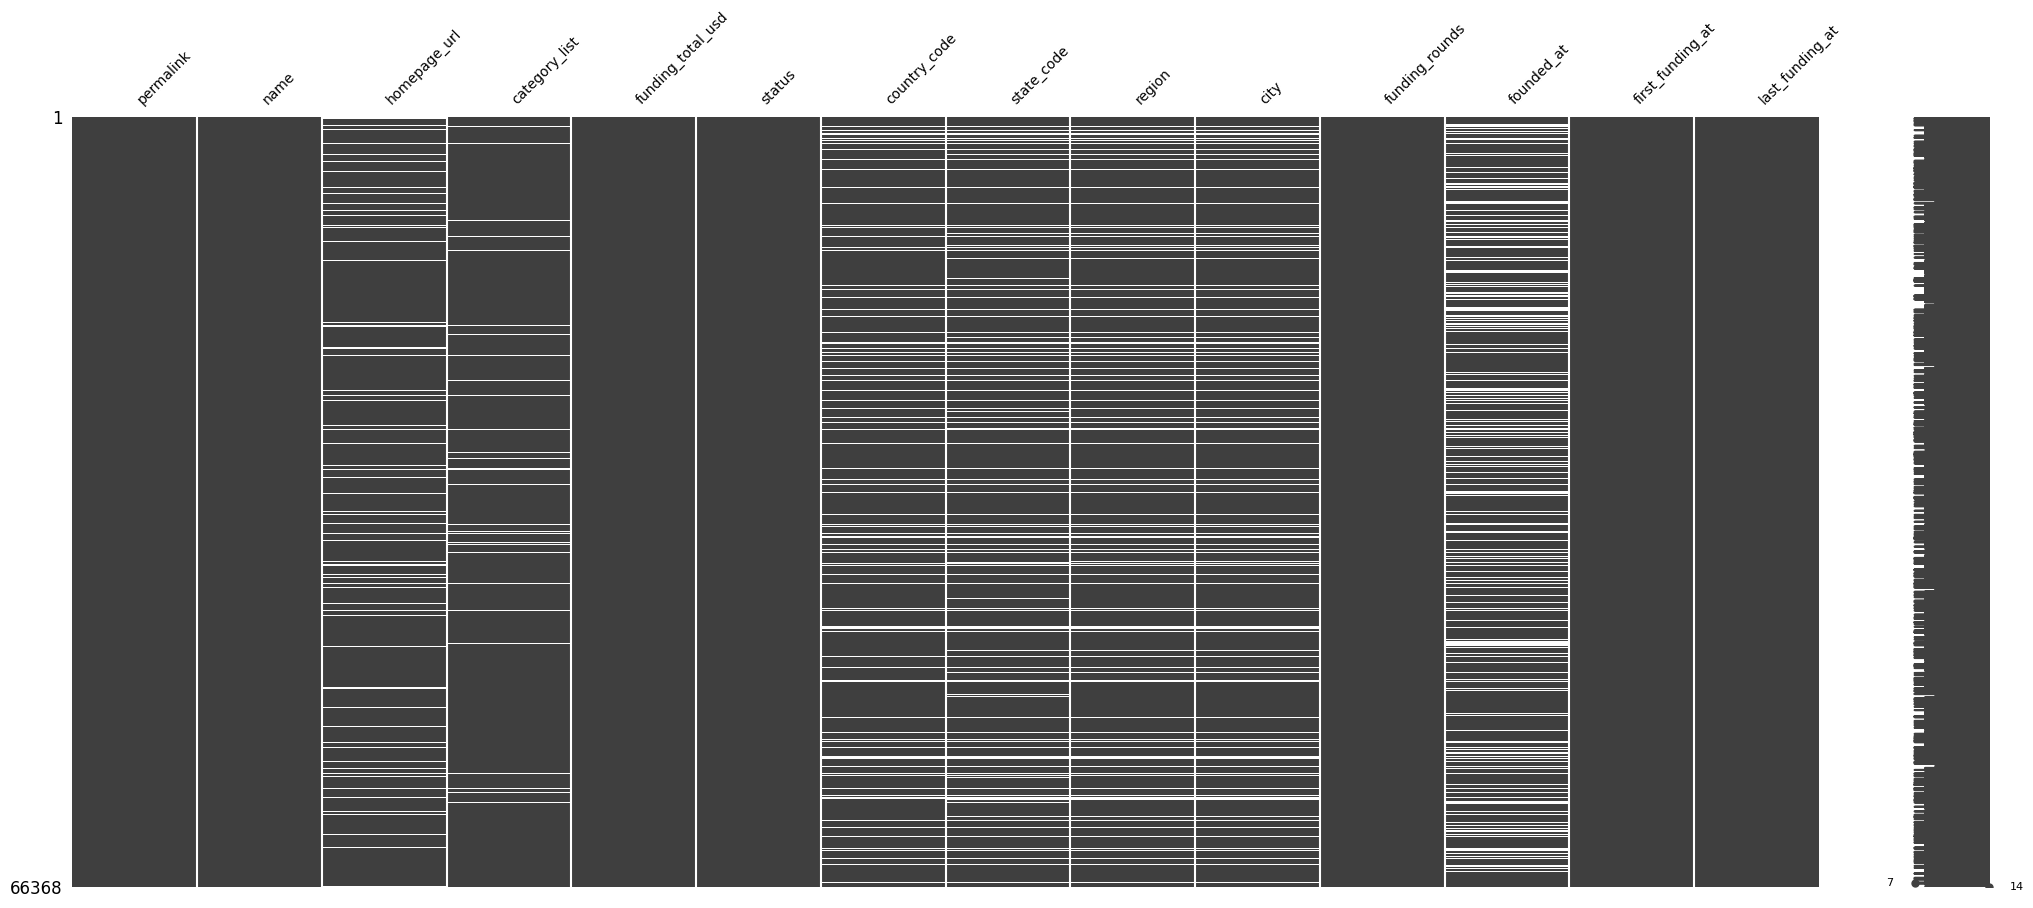

In [9]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


big_data_startup = pd.read_csv("big_startup_secsees_dataset.csv")

plt.figure(figsize=(12, 6))
msno.matrix(big_data_startup, fontsize=10)


plt.show()


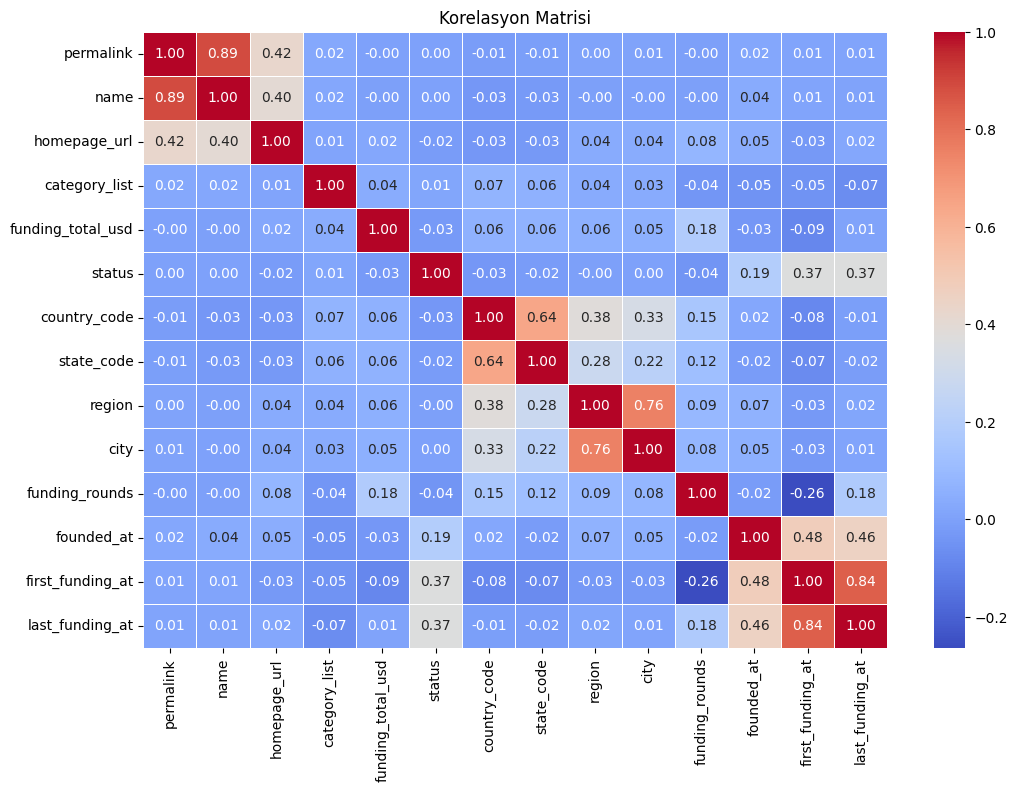

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kullanıcının dosyayı yüklemesini bekliyoruz.
file_path = "big_startup_secsees_dataset.csv"
try:

    big_data_startup = pd.read_csv(file_path)


    for col in big_data_startup.select_dtypes(include=['object']).columns:
        big_data_startup[col] = big_data_startup[col].astype('category').cat.codes


    correlation_matrix = big_data_startup.corr()


    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Korelasyon Matrisi")
    plt.show()

except FileNotFoundError:


In [17]:
file_path = "big_startup_secsees_dataset.csv"


big_data_startup = pd.read_csv(file_path)


missing_percentage = (big_data_startup.isnull().sum() / len(big_data_startup)) * 100

print(missing_percentage)

permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd     0.000000
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64


<ipython-input-18-dceede0d7767>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


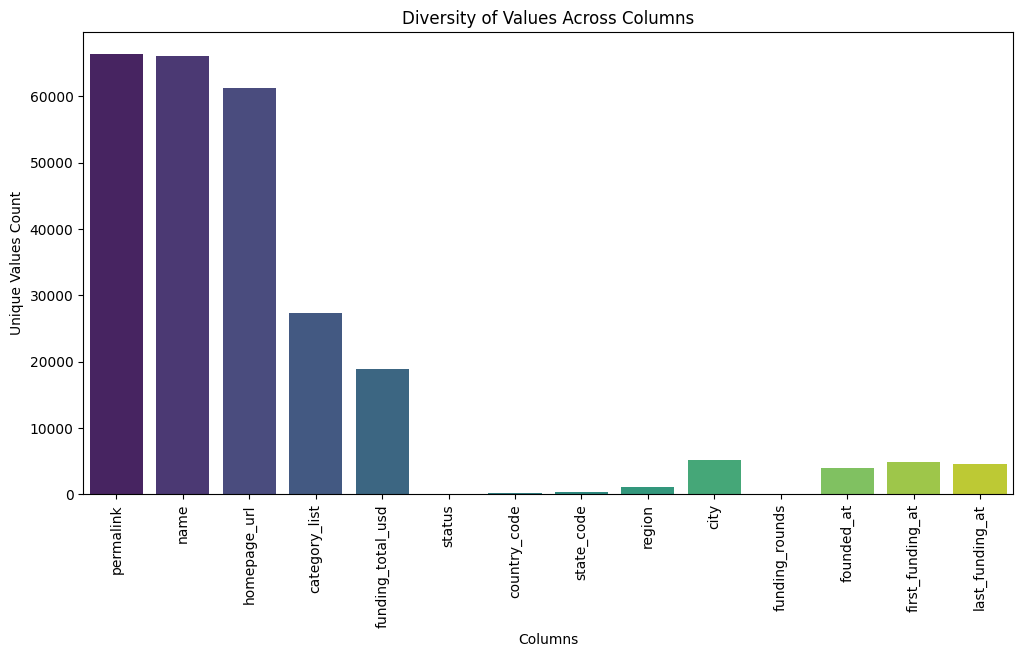

In [18]:
file_path = "big_startup_secsees_dataset.csv"


big_data_startup = pd.read_csv(file_path)


unique_counts = big_data_startup.nunique()


plt.figure(figsize=(12, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Unique Values Count")
plt.title("Diversity of Values Across Columns")
plt.show()

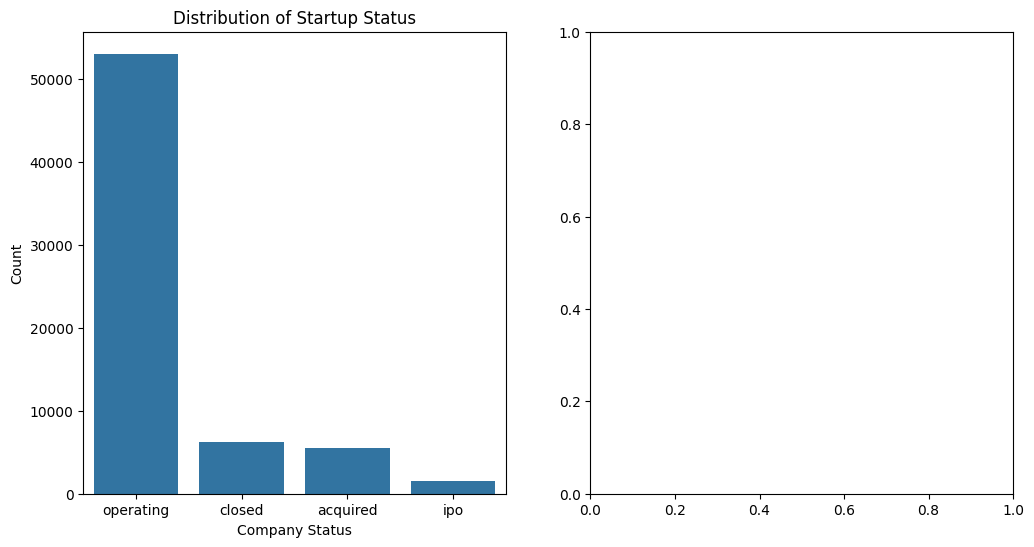

In [21]:
file_path = "big_startup_secsees_dataset.csv"

big_data_startup = pd.read_csv(file_path)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.countplot(x=big_data_startup["status"], order=big_data_startup["status"].value_counts().index)
plt.xlabel("Company Status")
plt.ylabel("Count")
plt.title("Distribution of Startup Status")


plt.subplot(1, 2, 2)


status_years = big_data_startup.groupby(["founded_at", "status"]).size().unstack().fillna(0)
status_years = status_years.div(status_years.sum(axis=1), axis=0) * 100




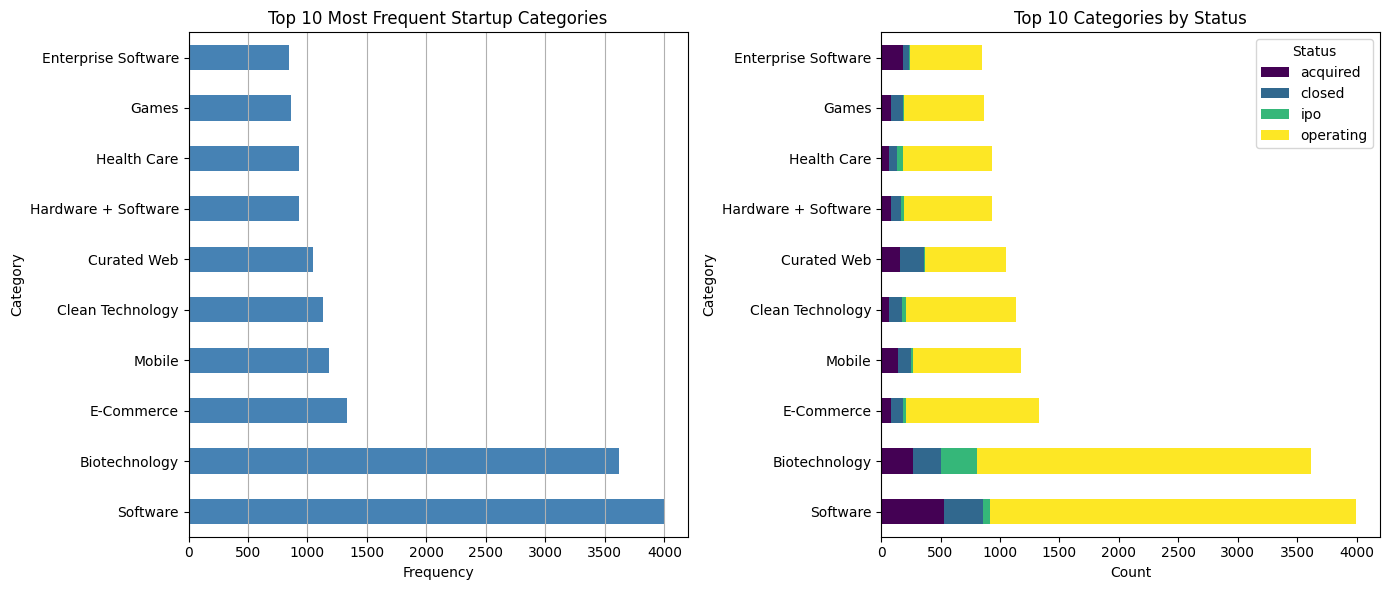

In [22]:
file_path = "big_startup_secsees_dataset.csv"


big_data_startup = pd.read_csv(file_path)


plt.figure(figsize=(14, 6))



top_categories = big_data_startup["category_list"].value_counts().head(10)


categories_norm = big_data_startup["category_list"].value_counts(normalize=True).head(10)

plt.subplot(1, 2, 1)
top_categories.plot(kind="barh", color="steelblue")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.title("Top 10 Most Frequent Startup Categories")
plt.grid(axis="x")

plt.subplot(1, 2, 2)
category_status_counts = big_data_startup.groupby(["category_list", "status"]).size().unstack().fillna(0)
top_category_status = category_status_counts.loc[top_categories.index]

top_category_status.plot(kind="barh", stacked=True, colormap="viridis", ax=plt.gca())
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Top 10 Categories by Status")
plt.legend(title="Status")

plt.tight_layout()
plt.show()